In [6]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
# Setear el dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Aplicar K-means con 4 valores diferentes de K
k_values = [2, 3, 4, 5]

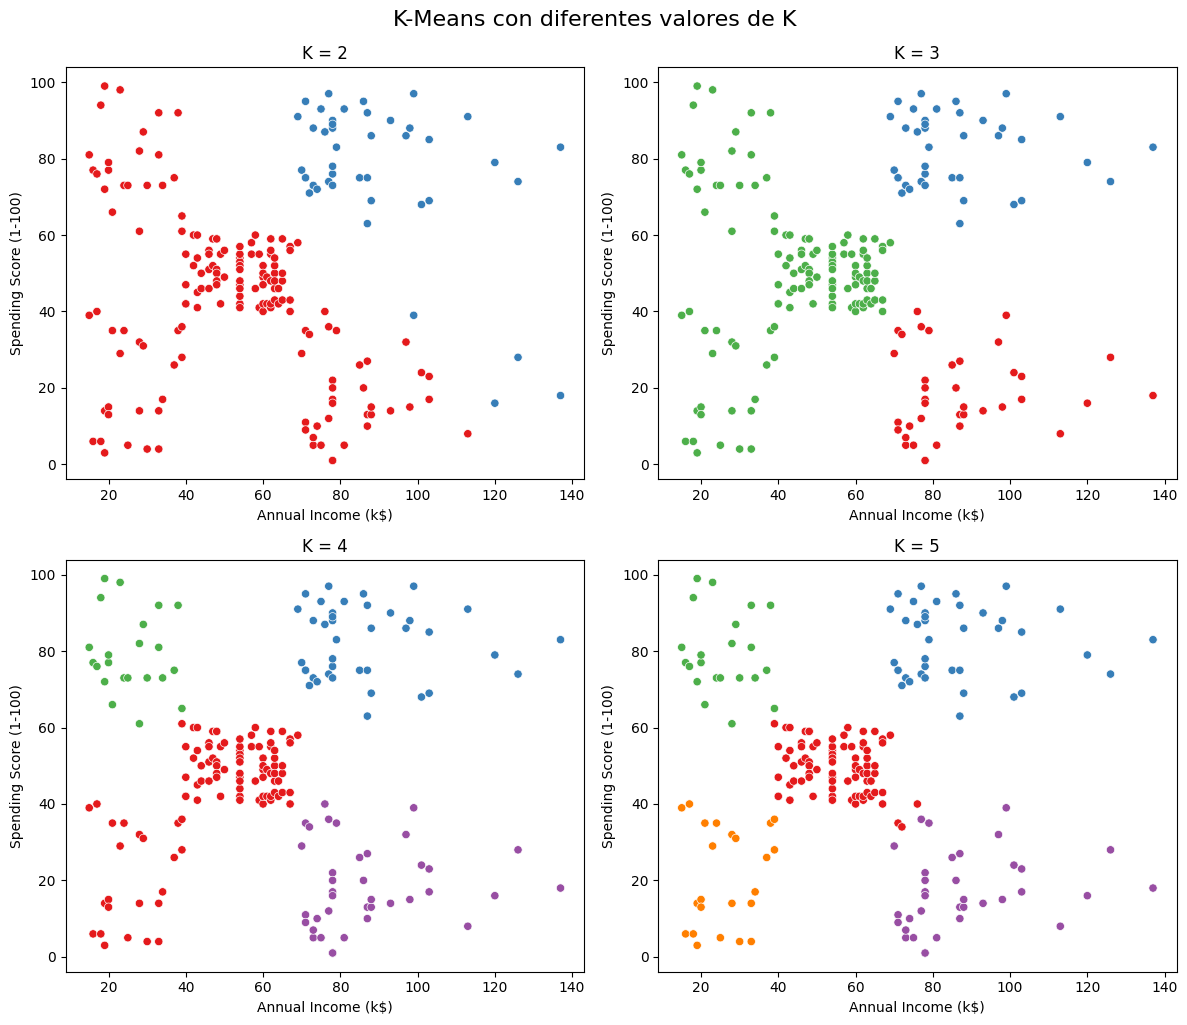

In [10]:
# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
    
    # Graficar resultados
    sns.scatterplot(
        x=X["Annual Income (k$)"],
        y=X["Spending Score (1-100)"],
        hue=y_kmeans,
        palette="Set1",
        ax=axes[i],
        legend=None
    )
    axes[i].set_title(f"K = {k}")

plt.tight_layout()
plt.suptitle("K-Means con diferentes valores de K", fontsize=16, y=1.02)
plt.show()

In [13]:
# Calculo del cluster

from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score
    print(f"K = {k} → Índice de silueta = {score:.3f}")


K = 2 → Índice de silueta = 0.397
K = 3 → Índice de silueta = 0.467
K = 4 → Índice de silueta = 0.494
K = 5 → Índice de silueta = 0.555


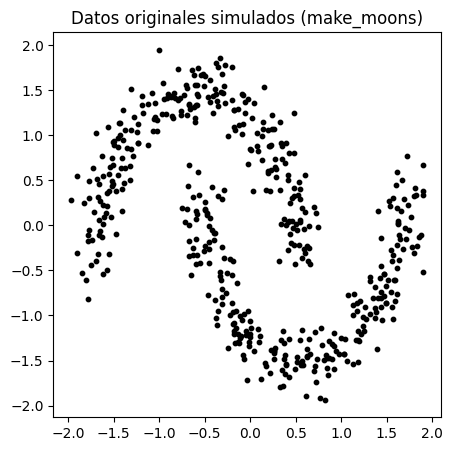

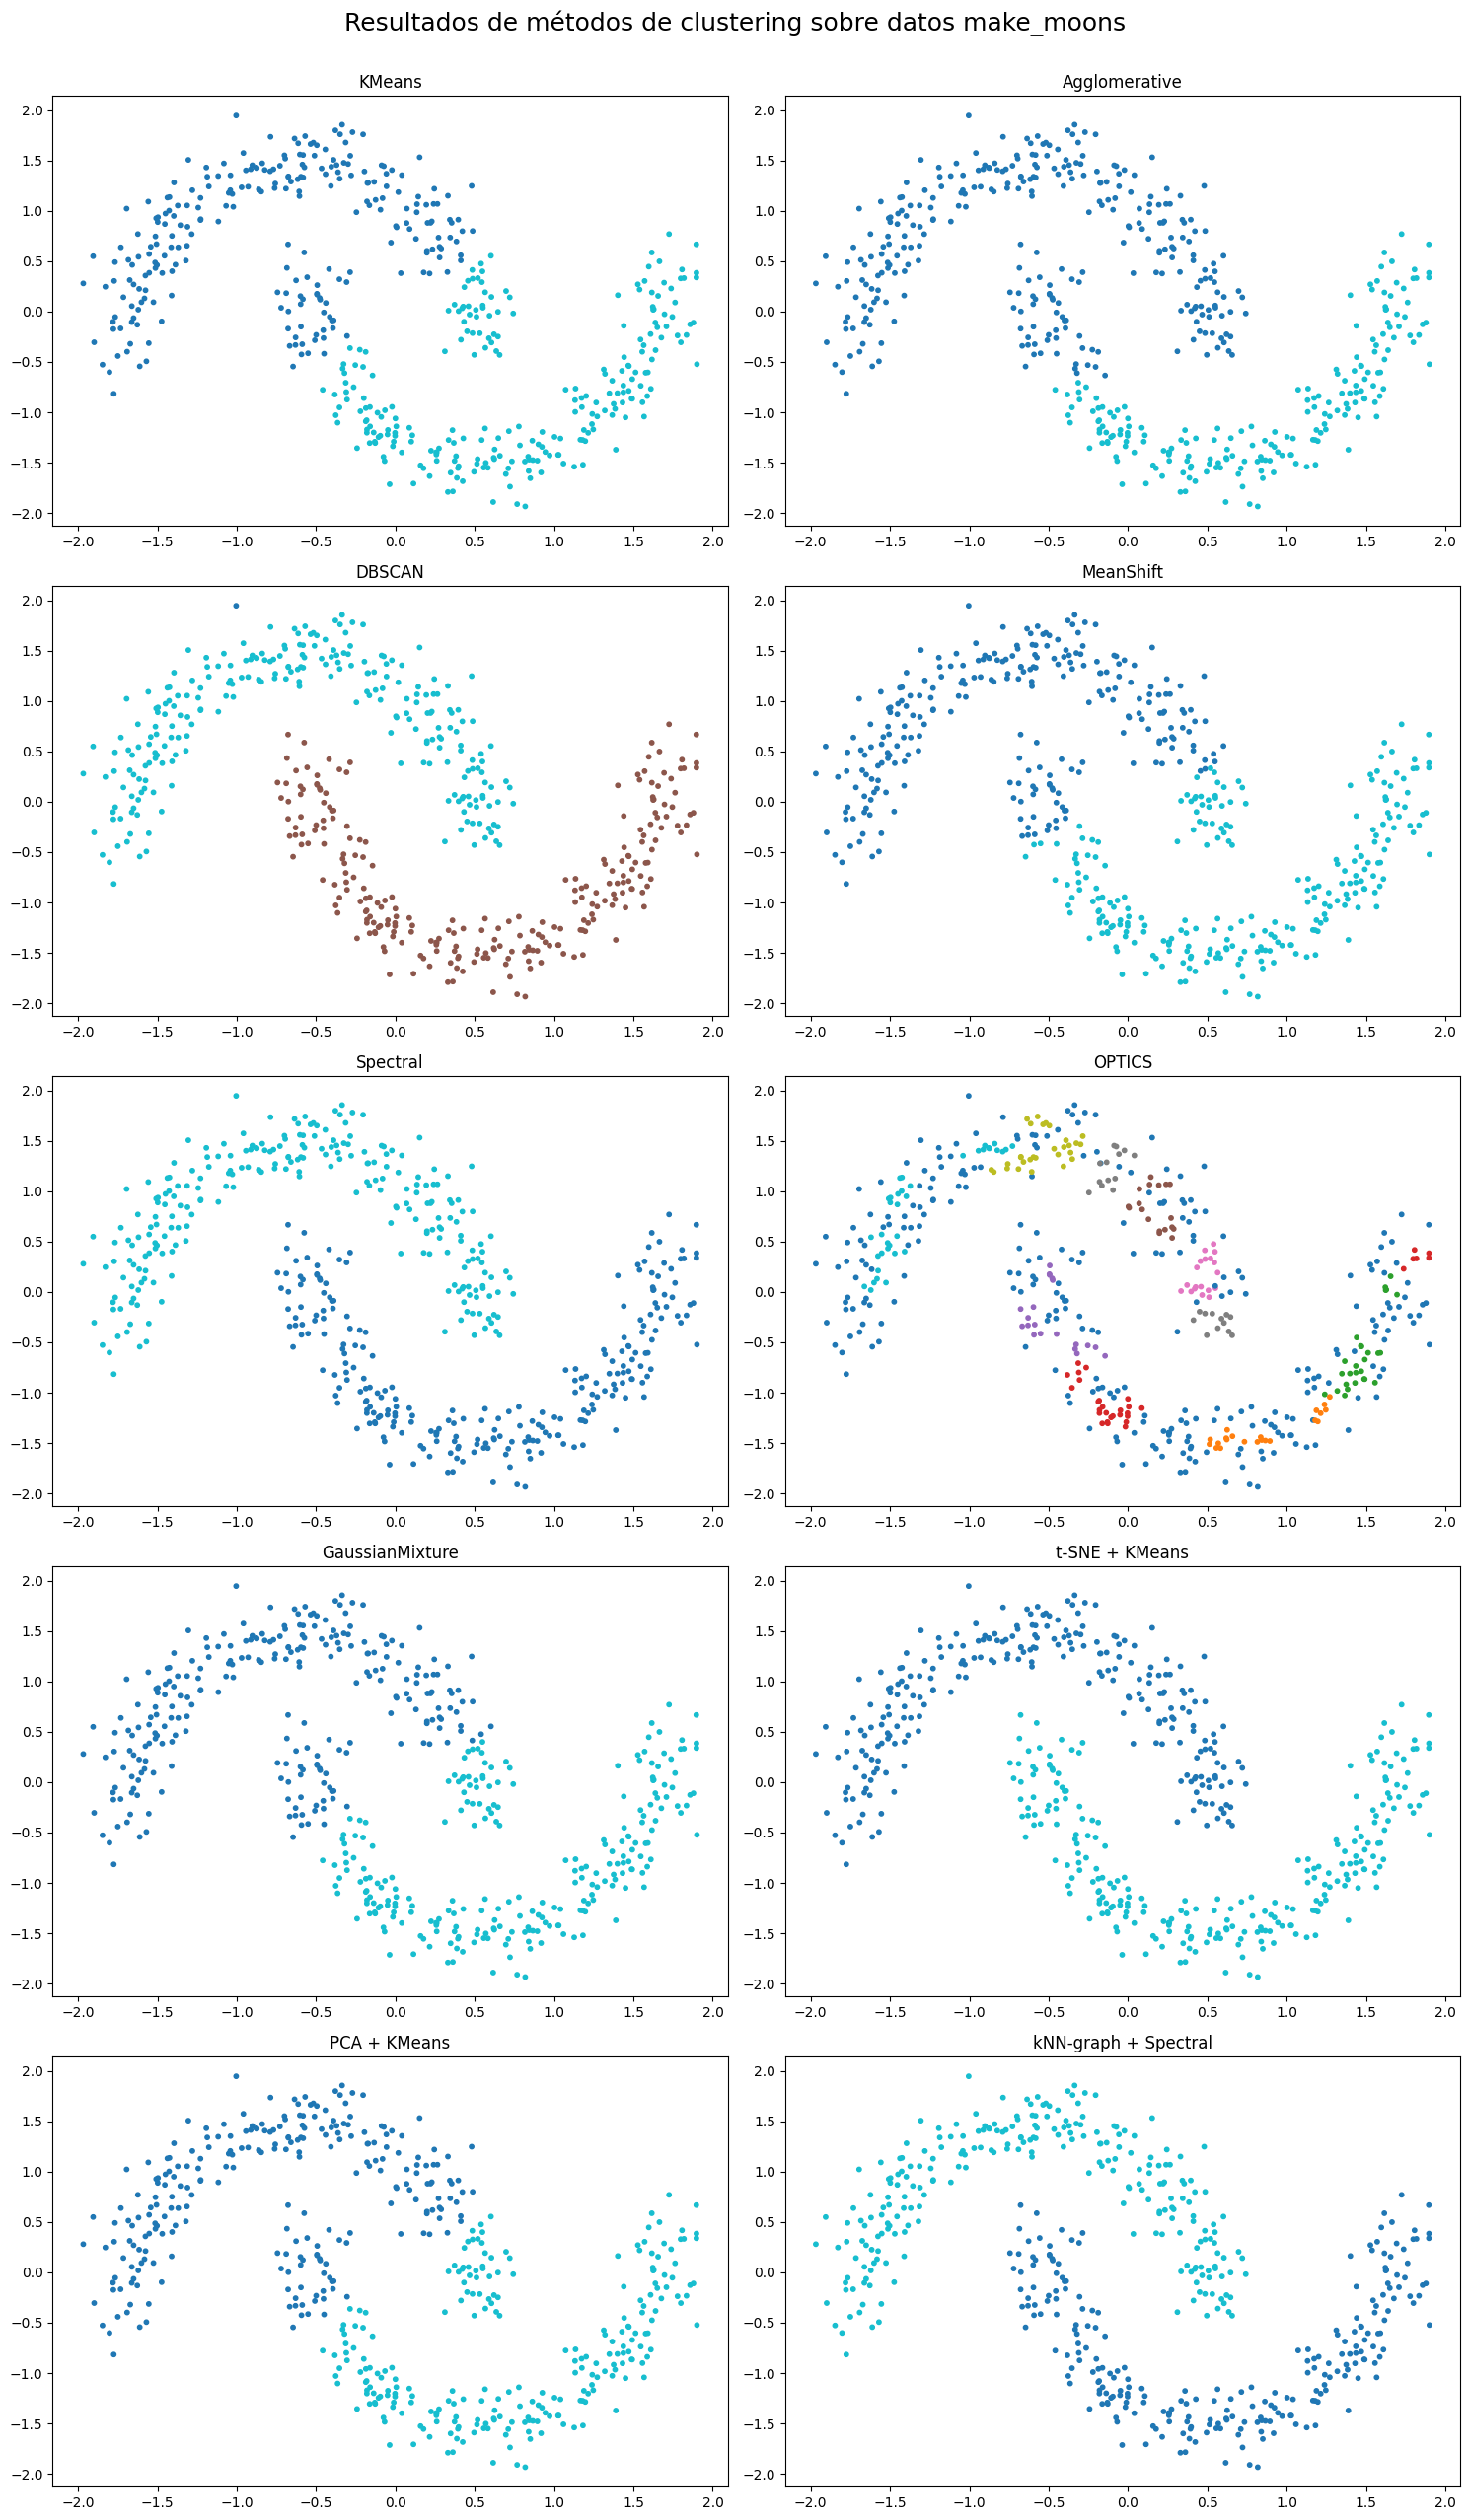

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# 1. Generar datos sintéticos con make_moons
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)

# 2. Lista de métodos de clustering
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=2),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=5),
    "MeanShift": MeanShift(),
    "Spectral": SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42),
    "OPTICS": OPTICS(min_samples=5),
    "GaussianMixture": GaussianMixture(n_components=2, random_state=42),
    "t-SNE + KMeans": KMeans(n_clusters=2, random_state=42),
    "PCA + KMeans": KMeans(n_clusters=2, random_state=42),
    "kNN-graph + Spectral": SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
}

# 3. Graficar los datos originales
plt.figure(figsize=(5, 5))
plt.title("Datos originales simulados (make_moons)")
plt.scatter(X[:, 0], X[:, 1], c='black', s=10)
plt.show()

# 4. Aplicar los métodos y graficar resultados
fig, axs = plt.subplots(5, 2, figsize=(15, 25))
axs = axs.flatten()

for i, (name, model) in enumerate(clustering_algorithms.items()):
    if name == "GaussianMixture":
        y_pred = model.fit_predict(X)
    elif name == "t-SNE + KMeans":
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X)
        y_pred = model.fit_predict(X_tsne)
    elif name == "PCA + KMeans":
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        y_pred = model.fit_predict(X_pca)
    else:
        y_pred = model.fit_predict(X)

    axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='tab10', s=10)
    axs[i].set_title(name)

plt.tight_layout()
plt.suptitle("Resultados de métodos de clustering sobre datos make_moons", y=1.02, fontsize=18)
plt.show()
